In [19]:
import os
import joblib
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
working_dir = os.getcwd()
print(f"You are now working in {working_dir}")
print("If you need to change to the parent directory, run the cell below")

You are now working in c:\Users\fredd\Desktop\Studier\Project5\flowers\flowers_CNN\jupyter_notebooks
If you need to change to the parent directory, run the cell below


In [4]:
os.chdir(os.path.dirname(working_dir))

In [5]:
working_dir = os.getcwd()
print(f"You have now changed your working directory to {working_dir}")

You have now changed your working directory to c:\Users\fredd\Desktop\Studier\Project5\flowers\flowers_CNN


In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print("This version already exists, create a new version if you are working on a new version")
    pass
else:
    os.makedirs(name=file_path)

In [8]:
python_path = working_dir + '/' 'python'
python_path

'c:\\Users\\fredd\\Desktop\\Studier\\Project5\\flowers\\flowers_CNN/python'

In [ ]:
python_path = os.path.join(working_dir, 'python')

sys.path.append(python_path)


<hr>

### Search for non-image files


In [ ]:
"""
This function will search through the raw dataset
for files that doesn´t have the extensions
that we typed in at 'image_extension'.

When going through all the files the arrays for
image_files and non_image_files are filled with
result that in the end will be printed out.    
"""


def search_non_image_files(raw_dir):
    
    image_extension = ('.png', '.jpg', '.jpeg') # file extensions to search for
    
    non_image_files = [] # array for files without the extension searched for
    image_files = [] # array for image files with the extension searched for
    
    folders = os.listdir(raw_dir)
    for folder in folders:
        files = os.listdir(os.path.join(raw_dir, folder))
        
        for file in files: 
            file_location = os.path.join(raw_dir, folder, file)
            if not file.lower().endswith(image_extension):
                non_image_files.append(file_location)
            else:
                image_files.append(file_location)
    

    print("Total amount of folders searched:", len(folders))
    print("Total image files found:", len(image_files))
    print("Total non image files found:", len(non_image_files))
    
    return image_files, non_image_files

In [ ]:
search_non_image_files(raw_dir='input/dataset/raw/flower_photos')

<hr>

### Find names on the flower categories

In [ ]:
def names_of_the_flowers():
    
    folders = 'input/dataset/raw/flower_photos'
    
    
    flowers = []
    for directory in os.listdir(folders):
        directory_path = os.path.join(folders, directory)
        if os.path.isdir(directory_path):
            flowers.append(directory)
            
    
    print("These are the flowers we are handling:")
    for flower in flowers:
        print(flower)
    
    return flowers

flowers = names_of_the_flowers()
print("Amount of species:", len(flowers))  

# Save flowers as a .pkl-file
file_path = 'outputs/v1'  
joblib.dump(value=flowers, filename=f"{file_path}/flowers.pkl")

<hr>

### Image distribution

In [ ]:
def images_percentage_distribution(image_dirs, save_path=None):

    # Creates a list that collects images per flower category
    images_per_flower = {}
    for flowers in os.listdir(image_dirs):
        flowers_path = os.path.join(image_dirs, flowers)
        if os.path.isdir(flowers_path):
            images_per_flower[flowers] = len([img for img in os.listdir(flowers_path) if img.endswith(('.png', 'jpg', 'jpeg'))])
            

    # Convert this list to a dataframe
    df = pd.DataFrame(list(images_per_flower.items()), columns=['Flowers', 'Count'])

    # Calculate the percentage of images per flower
    df['Percentage'] = (df['Count'] / df['Count'].sum()) * 100

    # Calculate the highest, the lowest and mean value of the distribution
    highest = df.loc[df['Percentage'].idxmax()]
    lowest = df.loc[df['Percentage'].idxmin()]
    mean_percentage = df['Percentage'].mean()
    mean_count = df['Count'].mean()


    # Create a barplot to visualize this distibution of images per flower
    plt.figure(figsize=(15, 8))
    plt.bar(df['Flowers'], df['Percentage'], color='skyblue')
    plt.axhline(y=mean_percentage, color='r', linestyle='--')
    plt.xlabel('Flowers')
    plt.ylabel('Percentage (%)')
    plt.title('Percentage distribution of images per flower')
    plt.xticks(rotation=90)

    # Adds extra text to the top of the barplot
    plt.gcf().text(0.50, 0.85, f"Mean percentage: {mean_percentage:.2f}% ({mean_count:.0f} images)", fontsize=10)
    plt.gcf().text(0.40, 0.82, f"Highest percentage: {highest['Flowers']} - {highest['Percentage']:.2f}% ({highest['Count']} images)", fontsize=10)
    plt.gcf().text(0.40, 0.79, f"Lowest percentage: {lowest['Flowers']} - {lowest['Percentage']:.2f}% ({lowest['Count']} images)", fontsize=10)

    # If save_path is given it will save an image of the barplot at the given path
    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    
    # Shows the barplot
    plt.tight_layout()
    plt.show()
    
    return df

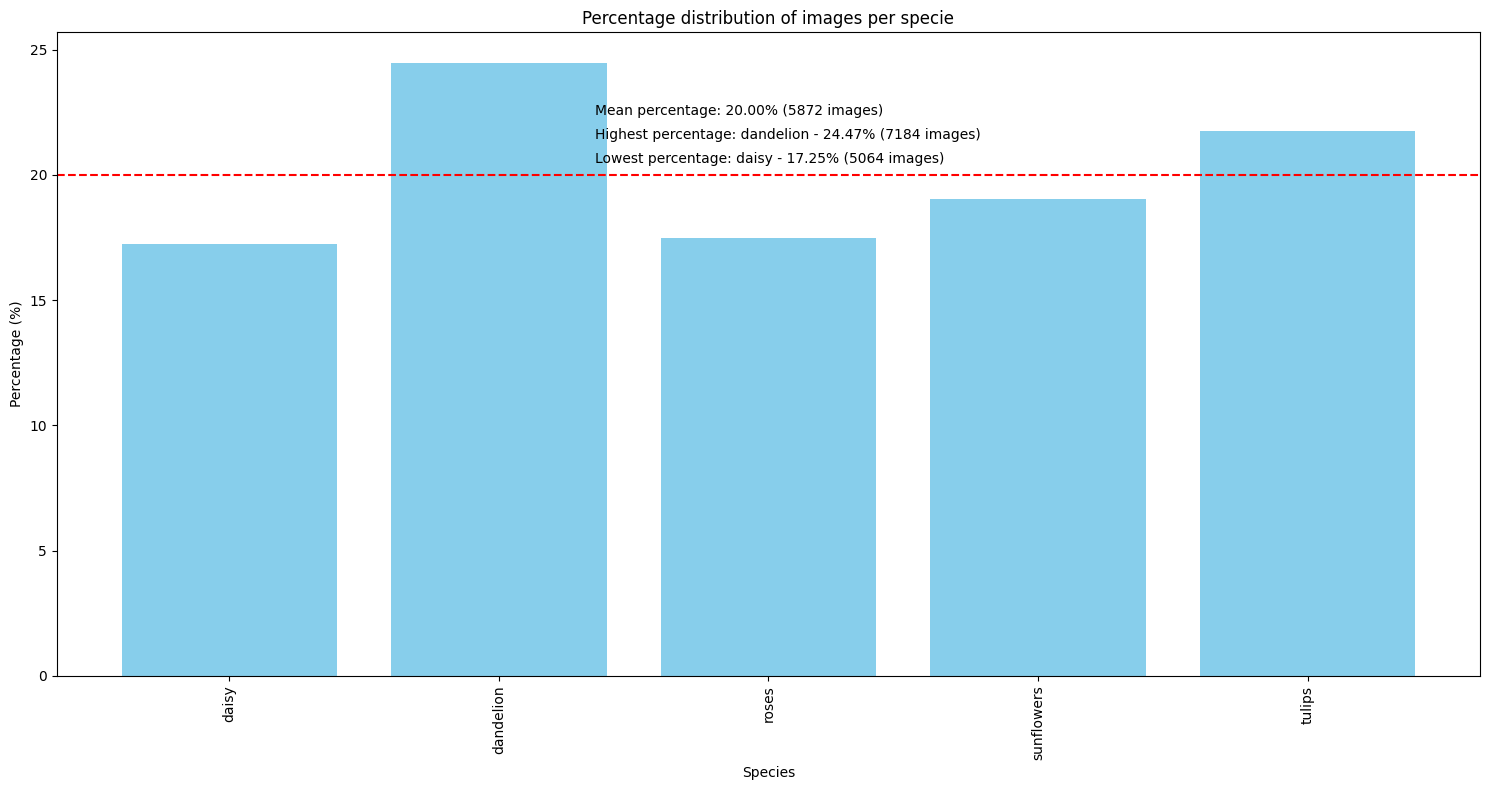

In [23]:
all_flowers = images_percentage_distribution(image_dirs = 'inputs/dataset/raw/flower_photos', save_path=f'outputs/{version}/raw_percentage_distribution.png')


